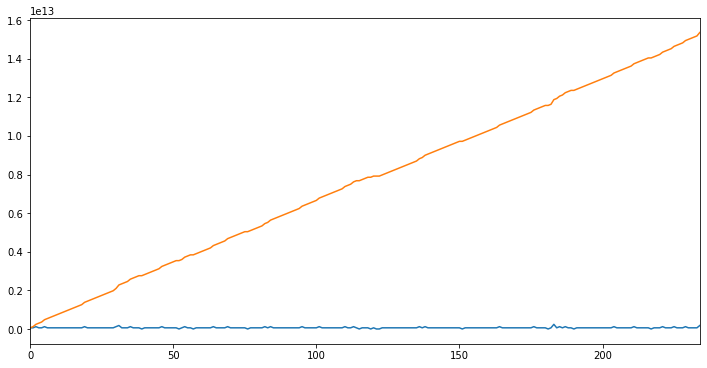

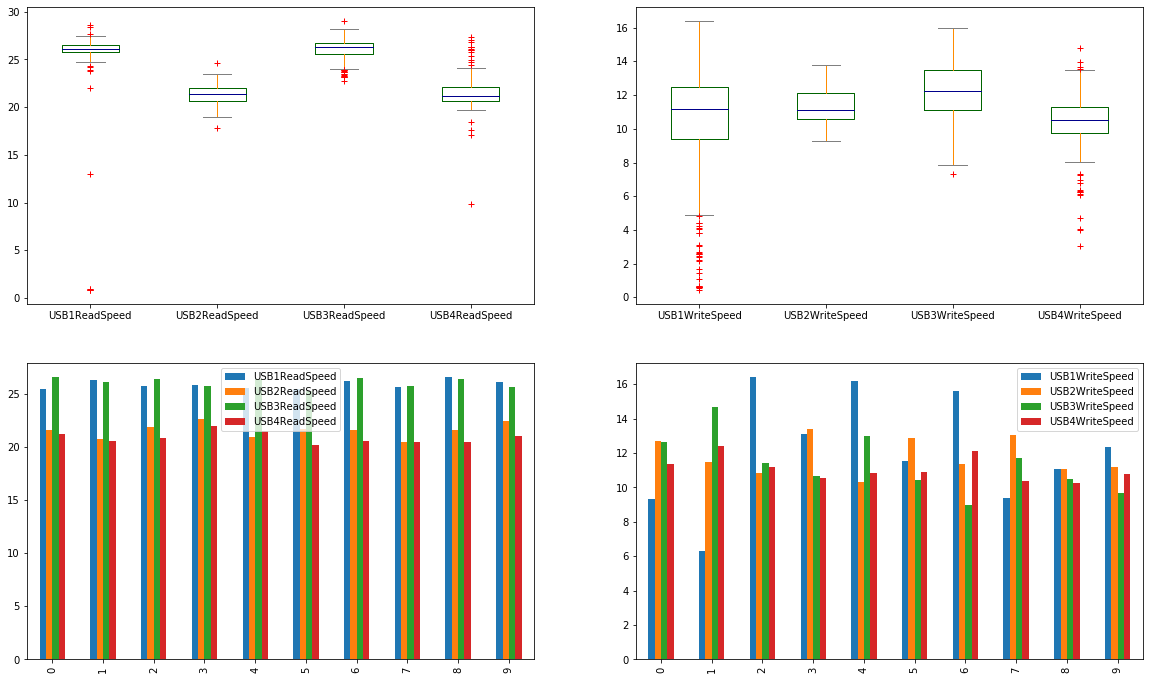

<Figure size 432x288 with 0 Axes>

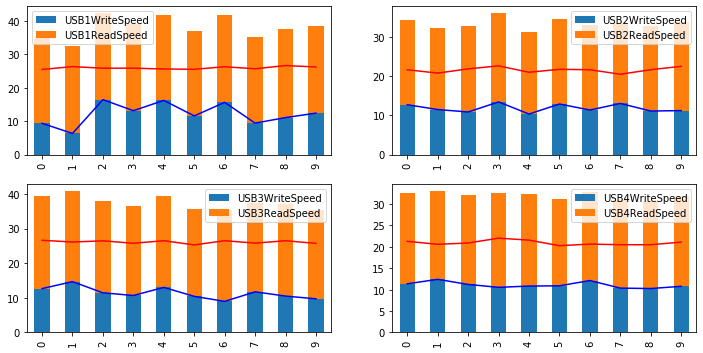

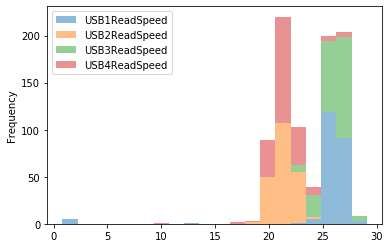

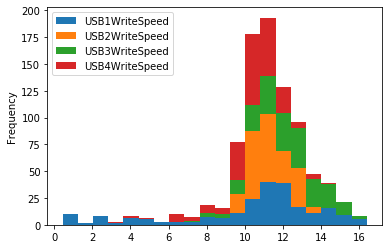

,SerialNumber,USB1ReadSpeed,USB1WriteSpeed,USB2ReadSpeed,USB2WriteSpeed,USB3ReadSpeed,USB3WriteSpeed,USB4ReadSpeed,USB4WriteSpeed,TestTime
count,2.350000e+02,225.000000,227.000000,215.000000,216.000000,218.000000,218.000000,217.000000,217.000000,235
mean,4.385219e+11,25.495378,10.301542,21.347721,11.292361,25.996560,12.237018,21.522627,10.369078,0 days 00:01:05.361702
std,2.671741e+10,3.883309,3.812638,0.958222,1.036665,1.070773,1.784238,1.698079,1.639022,0 days 00:00:28.588164
min,4.229660e+11,0.820000,0.430000,17.810000,9.250000,22.770000,7.320000,9.880000,3.060000,0 days 00:00:00
25%,4.251855e+11,25.760000,9.425000,20.645000,10.557500,25.585000,11.102500,20.690000,9.750000,0 days 00:01:00
50%,4.272860e+11,26.070000,11.200000,21.400000,11.095000,26.290000,12.255000,21.190000,10.510000,0 days 00:01:00
75%,4.295945e+11,26.460000,12.490000,22.020000,12.107500,26.710000,13.467500,22.140000,11.270000,0 days 00:01:00
max,4.990950e+11,28.600000,16.420000,24.600000,13.760000,29.070000,15.990000,27.380000,14.780000,0 days 00:04:00


In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import andrews_curves

BBT = pd.read_excel("C:\\Test\\py\\MCTStationLog_2019_07_08.xlsx","MCTStationLog_2019_07_08",
                    na_values={'USB1ReadSpeed':['Not Test','-100','0'],
                               'USB2ReadSpeed':['Not Test','-100','0'],
                               'USB3ReadSpeed':['Not Test','-100','0'],
                               'USB4ReadSpeed':['Not Test','-100','0'],
                               'USB1WriteSpeed': ['Not Test','-100','0'],
                               'USB2WriteSpeed': ['Not Test','-100','0'],
                               'USB3WriteSpeed': ['Not Test','-100','0'],
                               'USB4WriteSpeed': ['Not Test','-100','0'],
                               'StartDateTime':['NaN'],
                               'EndDateTime':['NaN']
                               })

"""
# TODO Sort the index
SortUSBT = BBT.sort_values(['USB1ReadSpeed'], ascending=False)

# TODO Plot the Hbar Chart 
SortUSBT['USB1ReadSpeed'].head(10).plot(kind="barh")
plt.figure()

# TODO Plot the Hist Chart 
BBT['USB1WriteSpeed'].head(200).plot(kind='hist')
plt.figure()
"""

# TODO Calc the test time
BBT['TestTime'] = BBT['EndDateTime'] - BBT['StartDateTime']
BBT['TestTime'].plot(figsize=(12, 6))
BBT['TestTime'].cumsum().plot()


# TODO Box Plot ALL USB Read/Write Speed

Adata = BBT[['USB1ReadSpeed','USB2ReadSpeed','USB3ReadSpeed','USB4ReadSpeed']]
Bdata = BBT[['USB1WriteSpeed','USB2WriteSpeed','USB3WriteSpeed','USB4WriteSpeed']]
fig_0, axes0 = plt.subplots(nrows=2,ncols=2,figsize=(20, 12))
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}
Adata.plot.box(color=color, sym='r+',ax=axes0[0,0])
Bdata.plot.box(color=color, sym='r+',ax=axes0[0,1])

Adata.head(10).plot.bar(stacked=False,ax=axes0[1,0])
Bdata.head(10).plot.bar(stacked=False,ax=axes0[1,1])
plt.figure()



#  USB  Write Speed vs Read Speed 
USB1Data = BBT[['USB1WriteSpeed','USB1ReadSpeed']]
USB2Data = BBT[['USB2WriteSpeed','USB2ReadSpeed']]
USB3Data = BBT[['USB3WriteSpeed','USB3ReadSpeed']]
USB4Data = BBT[['USB4WriteSpeed','USB4ReadSpeed']]
# TODO: Test the combine Bar and line Chart_, ax = plt.subplots()
fig_1, axes = plt.subplots(nrows=2,ncols=2)
# TODO: Plot USB1 Speed
USB1Data['USB1WriteSpeed'].head(10).plot(color='b',ax=axes[0,0],figsize=(12, 6))
USB1Data['USB1ReadSpeed'].head(10).plot(color='r',ax=axes[0,0])
USB1Data.head(10).plot.bar(stacked=True,ax=axes[0,0])

# TODO: Plot USB2 Speed
USB2Data['USB2WriteSpeed'].head(10).plot(color='b',ax=axes[0,1])
USB2Data['USB2ReadSpeed'].head(10).plot(color='r',ax=axes[0,1])
USB2Data.head(10).plot.bar(stacked=True,ax=axes[0,1])

# TODO: Plot USB3 Speed
USB3Data['USB3WriteSpeed'].head(10).plot(color='b',ax=axes[1,0])
USB3Data['USB3ReadSpeed'].head(10).plot(color='r',ax=axes[1,0])
USB3Data.head(10).plot.bar(stacked=True,ax=axes[1,0])

# TODO: Plot USB4 Speed
USB4Data['USB4WriteSpeed'].head(10).plot(color='b',ax=axes[1,1])
USB4Data['USB4ReadSpeed'].head(10).plot(color='r',ax=axes[1,1])
USB4Data.head(10).plot.bar(stacked=True,ax=axes[1,1])



"""
# TODO: Plot Hist
USB1Data.plot.hist(stacked=True, bins=20)
USB2Data.plot.hist(stacked=True, bins=20)

USB3Data.plot.hist(stacked=True, bins=20)
USB4Data.plot.hist(stacked=True, bins=20)



# TODO: Plot Area Chart
Adata.head(10).plot.area(alpha=0.5,stacked=False)
Bdata.head(10).plot.area(stacked=True)
plt.figure()

# TODO: plot scatter chart
SData = pd.DataFrame(np.random.rand(50,4),columns=['A','B','C','D'])
SData.plot.scatter(x='A',y='B',s=SData['C'] * 500)
"""

# TODO: Plot Hist
Adata.plot.hist(alpha=0.5,stacked=True, bins=20)
Bdata.plot.hist(alpha=1,stacked=True, bins=20)
plt.show()

# TODO Stastics
BBT.describe()
